In [1]:
!pip install mkwikidata
!pip install matplotlib

You should consider upgrading via the '/Users/pavelerokhin/pavel/sparql/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/pavelerokhin/pavel/sparql/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import mkwikidata
import pandas as pd

In [41]:
query = """
SELECT ?politician ?politicianLabel (GROUP_CONCAT(DISTINCT ?partyLabel; SEPARATOR = ", ") AS ?parties) (COUNT(DISTINCT ?children) AS ?numero_di_figli_in_politica) (GROUP_CONCAT(DISTINCT ?childrenLabel; SEPARATOR = ", ") AS ?figli) (GROUP_CONCAT(DISTINCT ?childrenPartyLabel; SEPARATOR = ", ") AS ?partiti_figli) WHERE {
  {
    SELECT ?politician ?politicianLabel ?children ?childrenLabel ?childrenPartyLabel ?partyLabel WHERE {
      ?politician wdt:P27 wd:Q38;
        wdt:P106 wd:Q82955;
        wdt:P102 ?party;
        wdt:P40 ?children.
      ?children wdt:P102 ?childrenParty.
      OPTIONAL { ?politician wdt:P570 ?deathDate. }
      OPTIONAL { ?children wdt:P570 ?deathDateChildren. }
      FILTER(!(BOUND(?deathDate)))
      FILTER(!(BOUND(?deathDateChildren)))
      SERVICE wikibase:label {
        bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en".
        ?party rdfs:label ?partyLabel.
        ?childrenParty rdfs:label ?childrenPartyLabel.
        ?politician rdfs:label ?politicianLabel.
        ?children rdfs:label ?childrenLabel.
      }
    }
  }
}
GROUP BY ?politician ?politicianLabel
"""

In [42]:
query_result = mkwikidata.run_query(query, params={})

In [43]:
data = [(x["politicianLabel"]["value"], int(x["numero_di_figli_in_politica"]["value"])) for x in
        query_result["results"]["bindings"]]
data.sort(key = lambda x: x[1])

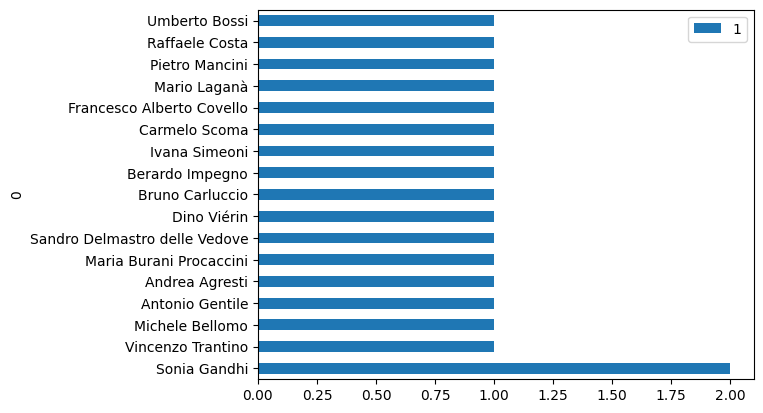

In [44]:
pd.DataFrame(data).set_index(0).tail(25).plot.barh().invert_yaxis()